<a href="https://colab.research.google.com/github/RaziehSh1987/ML-Learning-Code-and-Documents/blob/main/data_preprocessing_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Steps for PreProcessing the model:**
```


*   Read dataset by pandas
*   determine the Independent or inout(x) and Dependent or result(y) data of dataset ,almost allways last column is dependent value
*  remove missing data on X_datas by sklearn.SimpleImputer
*  Encoding all data in X ,y => convert all data to number (or if we need we use of onehotEncoding) by sklearn.columnTransformer  or sklearn.labelEncoder
*   split x,y datas to train and test data by sklearn.train_test_split
*   doing FeatureScaling on x datas to shows datas in specific numbers by standardisation (-3 to +3) or normalization (0 to 1) (except column that is calculated by OneHotEncoding) by  sklearn.StandardScaler 






```



# Data Preprocessing Tools


```
Udemy video Tutorial for data preprocessing:
https://www.udemy.com/course/machinelearning/learn/lecture/19019768#overview
```



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries

In [3]:
import numpy as np               # work with arrays
import matplotlib.pyplot as plt  #plot nice chart and graph
import pandas  as pd             #work with dataset , create matrix, feature.vector
# Sklearn==> for data preprocessings and model slection

## Importing the dataset

In [4]:
# read dataset(name.extention)
dataset=pd.read_csv('/content/drive/MyDrive/ML_Udemy_tutorial/Teacher_Files/part1-Data Preprocessing/Data.csv')

# matrix of features(X)(all data which i use and give them to the model to predict dependent variable:example=> country age , salary columns)
X=dataset.iloc[:,:-1].values   #iloc => index of location. [:,:2]=[:,:-1] . -1=> index of last column

# dependent variable vectors(Y)(the predicted variable .example=> purchased column) . values=>return the correspond values for each index
y=dataset.iloc[:,-1].values

In [ ]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data

In [5]:
# ignore or remove null data | replace missing value with average value of all value of that column

from  sklearn.impute import SimpleImputer # containing data processing tools
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')  # replace missing value with average value of all value of that column
imputer.fit(X[:,1:3]) #connect imputer to metrix of features . X[:,1:3]=>1,2 columns(age and salary)
X[:,1:3]=imputer.transform(X[:,1:3]) #replace new X data with all old X data



In [ ]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data

convert string to numeric  with one hot encoding.because for model is easy to work with number instead of string.

### Encoding the Independent Variable

In [6]:
from sklearn.compose import ColumnTransformer #for crate new colums
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough') # transformers=[(kind of act(encoder), name of model(one hot encoding), index od column for encoding(country))] #pass throght=> pass another columns which i won't to do one hot encoding  on it like age and salary
X = np.array(ct.fit_transform(X)) #to train the ML model,model except to get matrix ofnumpy array so we should convert all number to numpy array

In [7]:
print(X) #[1.0 0.0 0.0 44.0 72000.0] =>3 first column is for country ,4th number is age and 5th is salary  ,as a numpy array

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable:


```
convert no and yes to 0,1 with lable encoder(purchased column is output and its label)
```




In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() #call label encoder function
y=le.fit_transform(y) #aooly labelEncoder on related data(y)

In [9]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set


```
**we shoud apply feature scaling AFTER the spiliting the dataset,cause we prevent the lekage of data into test data**

its good that =>train_size=80% and test_size=20%

Random_state=> when splitting a dataset into training and testing subsets, setting the random_state parameter to a fixed value ensures that the same data points are assigned to the training and testing sets each time the code is executed. 


```



In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2 ,random_state=1 )

In [12]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [13]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [14]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [15]:
print(y_test)

[0 1]


## Feature Scaling


```
Normalisation=> is recommanded for when most of ***feature follow the normal distribution*** and  the data becom  between 0,1

Standardisation ==> is recommanded for allways. and improve training process. 
the data is between -3,+3

```



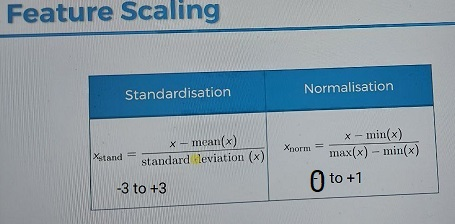



```
fit => get mean and standardisiation on each feature
transform==> apply the formula and transform value to variable
we have fit_transform command that do both above task
```



In [25]:
from sklearn.preprocessing import StandardScaler #standardesiation feature scaling 
sc=StandardScaler()
X_train[:,3:]=sc.fit_transform(X_train[:,3:]) #apply standardisiation only on Age and Salary column which is not oneHotEncoding
            #X[:,3:]=>all row  and age and salary columns #apply standardisation on data- but we dont need to do standardisation on the onehotEncoding data(country column)
X_test[:,3:]=sc.transform(X_test[:,3:])                                           

In [26]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [27]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]
